# NLP Notebook

Welcome to our Talent Co-Op workshop! We will be working through this notebook in small groups, with each group led by a mentor. Hopefully by the end of this, you will have good foundational knowledge in the Natural Language Processing (NLP) area of data science!

<br/>
<details>
  <summary><b>▶ Discuss: What is NLP and what are some use cases?</b></summary>

- Taking human text / speech and making it so that the computer can "understand" it (eg: twitter sentiment analysis)
- Allowing computers to generate human-like text / speech (eg: chatbot)
</details>


Throughout this notebook, we will have checkpoints to stop to discuss and take stock. If you click on the discussion question, it will display some brief discussion notes to go along with it, but here is where your group should stop to chat more in detail and come up with questions. We will have a retrospective to share our learnings at the end of our workshop.


## Getting Started

Before we do anything, let's double check what version of Python we are running.

<br/>
<details>
  <summary><b>▶ Discuss: Why is knowing this so important?</b></summary>

1. Reproducibility! Whether you are reporting a bug (a big part of programming) or whether you are trying to run a notebook at a workshop (you currently!), we need to make sure everyone is running the same python in order to get the same results!
2. From our experience at PythonAnywhere helping over 400 thousand users, in practice, one of the top user problems comes from using multiple python versions and mixing them up. This results in confusion such as not being able to access the packages that you thought you installed.
</details>


In [1]:
from platform import python_version

print(python_version())

3.9.13


As you heard from our workshop introduction, PyData NumFOCUS plays an important role in maintaining the health of the community and supporting all the tools that we will be using today.

#### Loading the data

First grab the data that we've downloaded for you.
It is a collection of #PyDataLondon tweets that we downloaded using the Twitter API when we first ran this workshop at PyData London. The data is saved in the [pickle format](https://docs.python.org/3/library/pickle.html#data-stream-format).  
There are many other different formats, but this is one of the simpler ways. Don't worry about the different storage formats yet, but feel free to come back to explore different data formats when you are done the notebook!

In [2]:
import pickle

with open('../datasets/twitter_data.pkl', 'rb') as pickled_file:
    twitter_data = pickle.load(pickled_file)

## Data Exploration

One of the first things you should do after getting a dataset is to manually explore and understand it a bit.

For example, let's check how many tweets we have.

In [3]:
len(twitter_data)

3653

Let's see what a tweet looks like

In [4]:
twitter_data[0]

{'retweet_count': 0,
 'in_reply_to_status_id': None,
 'favorited': False,
 'id': 727874777088557056,
 'in_reply_to_status_id_str': None,
 'filter_level': 'low',
 'possibly_sensitive': False,
 'favorite_count': 0,
 'in_reply_to_screen_name': None,
 'entities': {'urls': [{'indices': [72, 95],
    'url': 'https://t.co/L38lFalyDw',
    'expanded_url': 'http://geospatialtraininges.com/2016/04/24/interpolacion-datos-meteorologicos-python-arcgis/',
    'display_url': 'geospatialtraininges.com/2016/04/24/int…'}],
  'user_mentions': [{'id': 1135342201,
    'screen_name': 'nosolosig',
    'indices': [3, 13],
    'name': 'Nosolosig',
    'id_str': '1135342201'},
   {'id': 1126242102,
    'screen_name': 'Gistraininges',
    'indices': [100, 114],
    'name': 'GisTraininges',
    'id_str': '1126242102'}],
  'hashtags': [{'text': 'Python', 'indices': [54, 61]},
   {'text': 'ArcGis', 'indices': [64, 71]}],
  'symbols': []},
 'in_reply_to_user_id': None,
 'is_quote_status': False,
 'text': 'RT @nosolo

The above may feel like a huge wall of text. Programming and data exploration is all about wrangling the object we are inspecting into a representation that we can more easily comprehend. Perhaps we could make it easier for our human brains to process by just getting the keys / the headings.

In [5]:
twitter_data[0].keys()

dict_keys(['retweet_count', 'in_reply_to_status_id', 'favorited', 'id', 'in_reply_to_status_id_str', 'filter_level', 'possibly_sensitive', 'favorite_count', 'in_reply_to_screen_name', 'entities', 'in_reply_to_user_id', 'is_quote_status', 'text', 'created_at', 'truncated', 'id_str', 'coordinates', 'timestamp_ms', 'in_reply_to_user_id_str', 'retweeted_status', 'retweeted', 'contributors', 'user', 'lang', 'source', 'geo', 'place'])

You may then identify that the key "text" is what we are most immediately interested in.

In [6]:
# Text of the first tweet
twitter_data[0]['text']

'RT @nosolosig: Interpolación de datos meteorológicos: #Python y #ArcGis https://t.co/L38lFalyDw por @Gistraininges'

In [7]:
# We can extract the text from the tweets
tweets_text = [tweet['text'] for tweet in twitter_data]

# To see if it works, let's print out the first 10 tweets
tweets_text[:10]

['RT @nosolosig: Interpolación de datos meteorológicos: #Python y #ArcGis https://t.co/L38lFalyDw por @Gistraininges',
 '@cityZenflagNews MyPOV: #QoTD #datascience is ask good questions.',
 'Free online learning- Python for data science  https://t.co/sbopcNdW5j',
 'RT @gugod: I never realized Python devs are that fancy https://t.co/0nlgwhCzA0',
 'New #internship opening at #Work4 in #SanFrancisco! Python #Developer #Intern https://t.co/gl5owKOD3O #Paris https://t.co/w7IqYAj9Ql',
 'RT @JobHero_io: #C++ #Python @mixpanel is seeking a Machine Learning Engineer to join their team in SF &gt;&gt; https://t.co/kg9EdUTJQg https://t…',
 'drunk C++, 4am Python, unknowability',
 'Python REST API Framework https://t.co/U3mvHsGT20 #webdesign',
 'Blender Game Engine et Gamekit jeu Force Cube sans script python https://t.co/0dRek2OMUW via @YouTube',
 'RT @JobHero_io: #Python #AngularJS @bastillenet is seeking a Full Stack UI Engineer to join their team &gt;&gt; https://t.co/bQMuw0OFzs https://t…']

Let's also take a look at the number of characters in a tweets.

In [8]:
tweet_lengths = [len(text) for text in tweets_text]

# Let's check the length of the first 10 tweets
tweet_lengths[:10]

[114, 65, 70, 78, 132, 146, 36, 60, 101, 146]

We can have better understanding of our data if we plot a histogram instead of looking at the list of numbers.

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='number of characters in tweet', ylabel='frequency'>

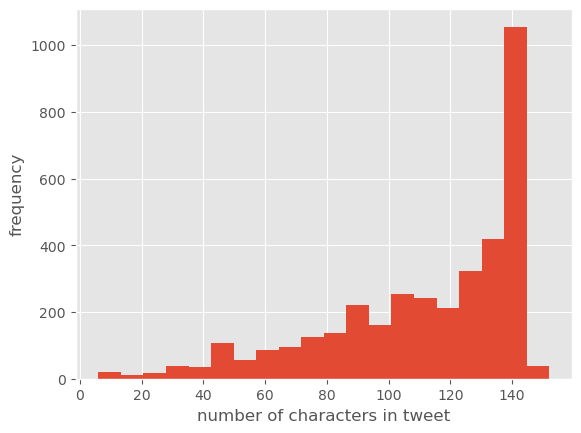

In [9]:
import pandas as pd
# Get notebook to show graphs
%pylab inline

# Use new pretty style of plots
matplotlib.style.use('ggplot')

# Because data scientists hate charts with no labels, let's add them :D
plt.ylabel('frequency')
plt.xlabel('number of characters in tweet')

# We can transform our list of tweet lengths from list to pandas Series
# it will conveniently let us to use the hist() method to create a histogram graph
pd.Series(tweet_lengths).hist(bins=20)

In [10]:
# What's the average number of characters? What's the maximum or minimum?
# We will again use pandas Series instead of the python builtin type (list)
# It will allow us to use the describe method
tweet_lengths_series = pd.Series(tweet_lengths)

tweet_lengths_series.describe()

count    3653.000000
mean      112.016151
std        31.293920
min         6.000000
25%        92.000000
50%       123.000000
75%       139.000000
max       152.000000
dtype: float64

<br/>
<details>
  <summary><b>▶ Discuss: Is there anything interesting about the distribution of the number of characters in each tweet?</b></summary>
    
Notice that most tweets seem to be approaching but below 140 characters- an indication that this dataset is from before Twitter changed their character limit of 140. The earliest version of this notebook was created for a PyData London workshop event in 2016! This is the type of thing to keep an eye out for when exploring data.
</details>

<br/>
<details>
  <summary><b>▶ Discuss: You may have also noticed that we spend a lot of time seemingly doing similar things in this data exploration section. eg: from printing out the length of the first 10 tweets, to then plotting a graph. Why do we do that?</b></summary>

It is not just to show you different ways to explore data! This is in fact how you should do any data exploration or even approach anything new in programming (eg: debugging or learning a new library). You can start with small, easy to code snippets to build up your intuition about the dataset, and then do a more complicated analysis to confirm and increase your understanding. For example, armed with the baseline knowledge of the first 10 tweets, if your graph shows all the tweets at say 500 characters long, alarm bells should be going off in your head that perhaps your graphing code is doing something wrong. As you dive deeper, it may even make sense to discuss and state approximately what you expect certain code would return- this will give you great intuition and make sure that everyone is on the same page.
</details>


## Counting Word Frequencies

We are going to use a technique called bag-of-words (the simpler version of word vectors / word embeddings) to find out which words are most commonly used together with which other words. Along the way, we will also showcase a typical word count visualization.

In [11]:
# The collections python standard library module has lots of gems in it to allow for easier data manipulation
# Check it out!
from collections import defaultdict

word_count = defaultdict(int)

for tweet in tweets_text:
    for word in tweet.split():
        word_count[word] += 1

# Count the words used in our tweets
print('{} unique words'.format(len(word_count)))

12683 unique words


In [12]:
# Here is another collections feature that is quite useful!
from collections import Counter

words_counter = Counter(word_count)
print(words_counter.most_common(10))

[('RT', 1704), ('Python', 1030), ('to', 758), ('#DataScience', 675), ('in', 595), ('#datascience', 579), ('for', 508), ('a', 486), ('-', 471), ('the', 463)]


#### Word Cloud Visualization

Data science is all about creating an intuitive way to visualize data? One great thing about Python and other popular data science languages is that there is always an open source third party library to do something!

In [13]:
from wordcloud import WordCloud

⚠️ Did you see an error message running the cell above?

An important skill in programming is learning to read error message and find hints on what we need to do to resolve the error.

<br/>
<details>
    <summary><b>▶ Discuss: what are some typical error message patterns/hints?</b></summary>

Some typical messages and reasons:
- `ModuleNotFoundError: No module named 'asdf'` 
    - is it installed?
    - is it installed to the version of python that you are currently running?
    - if it's your own module are you in the correct working directory?
    - did you mis-spell the module?

- `FileNotFoundError: [Errno 2] No such file or directory: './datasets/twitter_data.pkl'`

</details>


In [14]:
!{sys.executable} -m pip install wordcloud

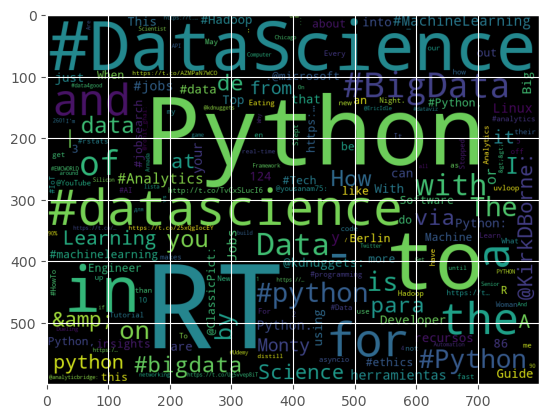

In [15]:
wordcloud = WordCloud(width=800, height=600).generate_from_frequencies(words_counter)
plt.imshow(wordcloud)

You may notice that there are gridlines and a weird x-y axis that we should probably turn off. Data visualization is all about tweaking these config settings.

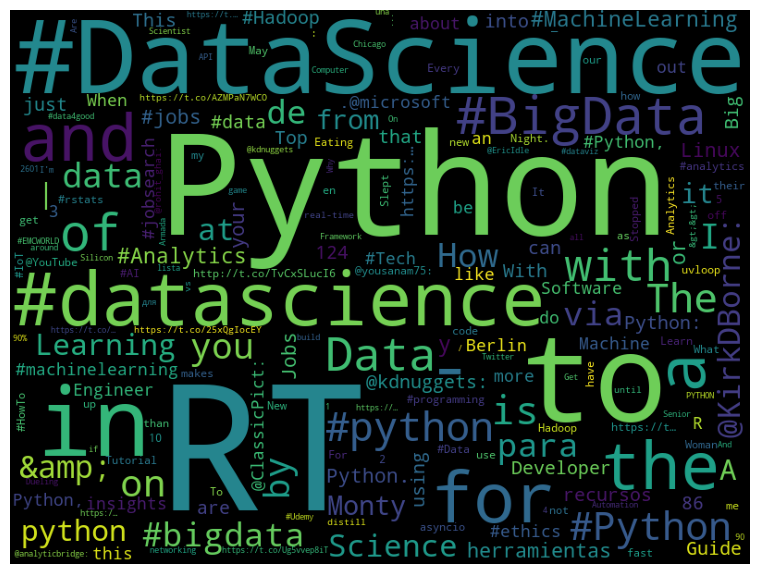

In [16]:
# for example, here is a quick function to turn off the gridlines and tweak the size of the chart
def prettify():
    """If you want to understand more about this function, refer to our data visualization notebook."""
    # turn off the gridlines and x-y axis
    plt.axis("off")
    # make the chart a bit larger
    multiplier = 1.5
    figure = plt.gcf()
    original_width, original_height = figure.get_size_inches()
    new_size = (original_width * multiplier, original_height * multiplier)
    figure.set_size_inches(new_size)


prettify()
plt.imshow(wordcloud)

#### Data cleaning

You may have noticed something bugging you about the word cloud. (If you missed our earlier point about looking at your data to increase your intuition and understanding for the data, **read it again**!)

We are long overdue for a data cleanup. We probably don't care about retweets, prepositions etc. And on that note, we also probably don't care about the words which only occur a couple times.

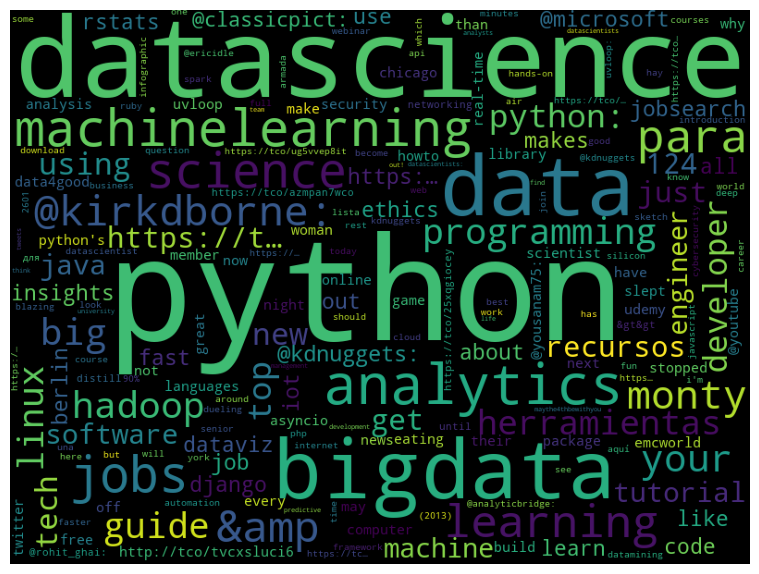

In [17]:
# Let's take out all hashtags (so that #python and python will be merged together)
# and also make everything lower case (so that DataScience and datascience will be merged together)

cleaned_tweets = []
for tweet in tweets_text:
    for symbol in '#,.;':
        tweet = tweet.replace(symbol, '')
    cleaned_tweets.append(tweet.lower())
    
word_count = defaultdict(int)
for tweet in cleaned_tweets:
    for word in tweet.split():
        word_count[word] += 1

        
# Perhaps we should exclude the most common words,
# like articles (the, a, ...), prepositions (on, by, ...) or some abreviations (rt - retweeted)
# Here's one way to do that:
exclude_words = {
    'rt', 'to', 'for', 'the', 'with', 'at', 'via', 'on', 'if', 'by', 'how', 'are', 'this', 'that',
    'do', 'into', 'or', '-', 'you', 'is', 'a', 'i', 'it', 'in', 'and', 'of', 'from', '&gt', 'when', 
    'what', 'can', 'more', 'our'
}

word_count_filtered = {k: v for k, v in word_count.items() if k.lower() not in exclude_words}

# Or for a more scalable way, why don't we also filter out all words with less than 3 characters
word_count_cleaned = {k: v for k, v in word_count_filtered.items() if len(k) >= 3}

wordcloud = WordCloud(width=800, height=600).generate_from_frequencies(Counter(word_count_cleaned))
prettify()
plt.imshow(wordcloud)

### Colocation/co-occurrence frequency

Now we are finally all set to answer this question:

If a word is in the tweet, how frequently do these other words also show up in the tweet? This will allow computers to "understand" human text, and is the foundation for applications including Twitter sentiment analysis.

Notice that when we compute co-occurrence frequencies, this scales up by n^2 -- this means that (especially when we are playing around with data) we could get everything to run a lot quicker by cutting down on the amount of data.

In [18]:
# Let's represent the word_count_filtered as pandas DataFrame
words = pd.DataFrame.from_dict(word_count_cleaned, orient='index').rename(columns={0: 'frequency'})

# Sanity check the data
words.head(15)

,frequency
@nosolosig:,1
interpolación,1
datos,9
meteorológicos:,1
python,1906
arcgis,2
https://tco/l38lfalydw,1
por,7
@gistraininges,1
@cityzenflagnews,1


In [19]:
# We want to limit our vocabulary to only the most common words

limit = 30
shortened_list = words[words.frequency > limit]
print(
    'If we limit the words to any word that at least occurs {} times, '
    'we are left with {} words (down from {} words)'.format(
        limit, len(shortened_list), len(words)
    )
)
shortened_list.head(15)

If we limit the words to any word that at least occurs 30 times, we are left with 128 words (down from 10365 words)


,frequency
python,1906
datascience,1308
good,32
free,37
online,37
data,633
science,180
new,84
developer,93
machine,66


In [20]:
# First, let's create a DataFrame filled with zeros
occurrence_frequency = pd.DataFrame(0, index=shortened_list.index.values, columns=shortened_list.index.values)

# Sanity check (let's see if we succeeded, by printed the first part of the matrix)
occurrence_frequency.iloc[:5, -5:]

,https://tco/25xqgiocey,2601,armada,@ericidle,data4good
python,0,0,0,0,0
datascience,0,0,0,0,0
good,0,0,0,0,0
free,0,0,0,0,0
online,0,0,0,0,0


In [21]:
# Next, let's remove all the unncessary words from our tweets
relevant_words = occurrence_frequency.index

shortened_tweets = []
for tweet in cleaned_tweets:
    shortened_tweet = [word for word in tweet.split() if word in relevant_words]
    if len(shortened_tweet) >= 2:
        shortened_tweets.append(shortened_tweet)

print(len(shortened_tweets))
# To check if everything works, we print the first 10 tweets
# we should see only the most common words
shortened_tweets[:10]

2821


[['datascience', 'good'],
 ['free', 'online', 'python', 'data', 'science'],
 ['new', 'python', 'developer'],
 ['python',
  'machine',
  'learning',
  'engineer',
  'their',
  '&gt&gt',
  'https://t…'],
 ['python', 'api', 'framework'],
 ['game', 'python', '@youtube'],
 ['python', 'engineer', 'their', '&gt&gt', 'https://t…'],
 ['python', 'api', 'framework', 'news'],
 ['bigdata', 'datascience', 'machinelearning'],
 ['like', 'python']]

In [22]:
# A triple for-loop to add up and fill in the counts for each word vis-a-vis other words
for word_list in shortened_tweets:
    for word in word_list:
        for other_word in word_list:
            occurrence_frequency[word][other_word] += 1

In [23]:
# Let's display our results (first 10 lines)
occurrence_frequency.head(10)

,python,datascience,good,free,online,data,science,new,developer,machine,...,woman,slept,stopped,eating,https://tco/azmpan7wco,https://tco/25xqgiocey,2601,armada,@ericidle,data4good
python,1750,104,14,9,6,121,85,46,93,44,...,38,37,38,38,37,37,0,0,7,0
datascience,104,1217,15,23,30,477,85,37,0,22,...,0,0,2,0,0,0,33,33,0,30
good,14,15,29,0,0,10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
free,9,23,0,34,9,13,10,0,0,4,...,0,0,0,0,0,0,0,0,0,0
online,6,30,0,9,37,1,2,0,1,2,...,0,0,0,0,0,0,0,0,0,0
data,121,477,10,13,1,847,175,12,0,21,...,0,0,1,0,0,0,0,0,0,16
science,85,85,1,10,2,175,188,5,0,6,...,0,0,0,0,0,0,0,0,0,0
new,46,37,0,0,0,12,5,83,11,0,...,0,0,0,0,0,0,0,0,0,2
developer,93,0,0,0,1,0,0,11,101,0,...,0,0,0,0,0,0,0,0,0,0
machine,44,22,0,4,2,21,6,0,0,72,...,0,0,0,0,0,0,0,0,0,0


In [24]:
not_zero = occurrence_frequency.any(axis=1)
occurrence_frequency = occurrence_frequency.loc[not_zero, not_zero]
occurrence_frequency.head(10)

,python,datascience,good,free,online,data,science,new,developer,machine,...,woman,slept,stopped,eating,https://tco/azmpan7wco,https://tco/25xqgiocey,2601,armada,@ericidle,data4good
python,1750,104,14,9,6,121,85,46,93,44,...,38,37,38,38,37,37,0,0,7,0
datascience,104,1217,15,23,30,477,85,37,0,22,...,0,0,2,0,0,0,33,33,0,30
good,14,15,29,0,0,10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
free,9,23,0,34,9,13,10,0,0,4,...,0,0,0,0,0,0,0,0,0,0
online,6,30,0,9,37,1,2,0,1,2,...,0,0,0,0,0,0,0,0,0,0
data,121,477,10,13,1,847,175,12,0,21,...,0,0,1,0,0,0,0,0,0,16
science,85,85,1,10,2,175,188,5,0,6,...,0,0,0,0,0,0,0,0,0,0
new,46,37,0,0,0,12,5,83,11,0,...,0,0,0,0,0,0,0,0,0,2
developer,93,0,0,0,1,0,0,11,101,0,...,0,0,0,0,0,0,0,0,0,0
machine,44,22,0,4,2,21,6,0,0,72,...,0,0,0,0,0,0,0,0,0,0


Great! Now we have everything setup and we are ready to look at the [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) between different words.

We are thinking of each word as a n-dimensional vector (where each dimension is the co-occurence frequency for another specific word). The cosine similarity basically looks and says, "hey `word_a` co-occurs a lot with `word_b` but does not appear with `word_c`. Oh hey, `word_d` also co-occurs a lot with `word_b` but not with `word_c`. I guess that `word_a` and `word_d` must be quite similar then."

In [25]:
from scipy.spatial.distance import pdist, squareform

cosine_distances = squareform(pdist(occurrence_frequency, metric='cosine'))
cosine_distances.shape

(128, 128)

In [26]:
# Let's look at the top left corner of our array
cosine_distances[:5,:5]

array([[0.        , 0.82716192, 0.58953179, 0.73496839, 0.84686582],
       [0.82716192, 0.        , 0.4787644 , 0.36975958, 0.54651483],
       [0.58953179, 0.4787644 , 0.        , 0.64147678, 0.77074316],
       [0.73496839, 0.36975958, 0.64147678, 0.        , 0.51182861],
       [0.84686582, 0.54651483, 0.77074316, 0.51182861, 0.        ]])

You can see that the distances between any word and itself is 0.
Let's flip it around for a second and look at similarity instead.

In [27]:
cosine_similarities_array = np.exp(-cosine_distances)
similarity = pd.DataFrame(
    cosine_similarities_array, 
    index=occurrence_frequency.index, 
    columns=occurrence_frequency.index
)
similarity.head(10)

,python,datascience,good,free,online,data,science,new,developer,machine,...,woman,slept,stopped,eating,https://tco/azmpan7wco,https://tco/25xqgiocey,2601,armada,@ericidle,data4good
python,1.000000,0.437289,0.554587,0.479521,0.428757,0.457292,0.546137,0.606749,0.702073,0.594993,...,0.532527,0.528900,0.532591,0.532366,0.528900,0.528900,0.389833,0.389833,0.424056,0.391178
datascience,0.437289,1.000000,0.619548,0.690900,0.578964,0.803242,0.642685,0.555145,0.391506,0.503608,...,0.376712,0.376535,0.383087,0.376861,0.376535,0.376535,0.575829,0.575829,0.374965,0.735011
good,0.554587,0.619548,1.000000,0.526514,0.462669,0.597523,0.558200,0.512705,0.455230,0.488244,...,0.413370,0.412273,0.416877,0.413459,0.412273,0.412273,0.440006,0.440006,0.392398,0.593081
free,0.479521,0.690900,0.526514,1.000000,0.599399,0.639868,0.639708,0.497574,0.417384,0.540361,...,0.394622,0.394173,0.398850,0.394621,0.394173,0.394173,0.472854,0.472854,0.376653,0.557692
online,0.428757,0.578964,0.462669,0.599399,1.000000,0.474859,0.458101,0.455596,0.400551,0.444930,...,0.379005,0.378720,0.381891,0.378956,0.378720,0.378720,0.431596,0.431596,0.376905,0.463190
data,0.457292,0.803242,0.597523,0.639868,0.474859,1.000000,0.809558,0.509966,0.397035,0.526058,...,0.382192,0.381905,0.387633,0.382461,0.381905,0.381905,0.461284,0.461284,0.374884,0.632216
science,0.546137,0.642685,0.558200,0.639708,0.458101,0.809558,1.000000,0.520543,0.440029,0.555790,...,0.404237,0.403451,0.408101,0.404236,0.403451,0.403451,0.421148,0.421148,0.383403,0.521595
new,0.606749,0.555145,0.512705,0.497574,0.455596,0.509966,0.520543,1.000000,0.589110,0.487370,...,0.422804,0.421540,0.425379,0.422966,0.421540,0.421540,0.445394,0.445394,0.394259,0.474129
developer,0.702073,0.391506,0.455230,0.417384,0.400551,0.397035,0.440029,0.589110,1.000000,0.481318,...,0.443517,0.441782,0.443450,0.443514,0.441782,0.441782,0.423893,0.423893,0.398249,0.369359
machine,0.594993,0.503608,0.488244,0.540361,0.444930,0.526058,0.555790,0.487370,0.481318,1.000000,...,0.417477,0.416372,0.419463,0.417507,0.416372,0.416372,0.402546,0.402546,0.391832,0.429048


Now you can see that any word is 100% similar with itself.  
Well that is great and all, but how would you visualize word similarity?  
It turns out that scikit learn has just the tool for us:

In [28]:
from sklearn import manifold

# see http://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling
mds = manifold.MDS(n_components=2, dissimilarity='precomputed')
words_in_2d = mds.fit_transform(cosine_distances)
words_in_2d[:5]

array([[-0.30334731,  0.03461634],
       [ 0.43625449,  0.12067093],
       [ 0.19224004,  0.16999377],
       [ 0.33130777,  0.17994169],
       [ 0.39405458, -0.44519348]])

[MDS](https://en.wikipedia.org/wiki/Multidimensional_scaling) allows us to go from the n by n matrix down to a more manageable lower-dimension representation of the n words.  
In this case, we choose a 2-d representation, which allows us to...

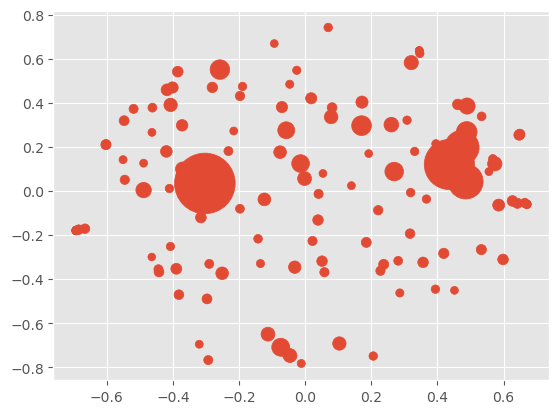

In [29]:
# make a bubble chart
counts = [word_count[word] for word in occurrence_frequency.index.values]
plt.scatter(x=words_in_2d[:,0], y=words_in_2d[:,1], s=counts)

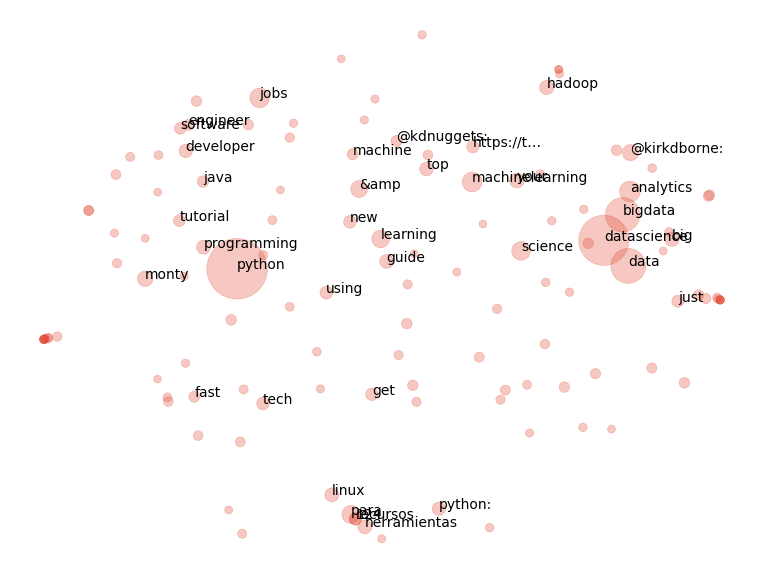

In [50]:
# let's prettify it and add labels
prettify()
for word in occurrence_frequency.index:
    if word_count[word] > 60:
        idx = occurrence_frequency.index.get_loc(word)
        plt.annotate(word, xy=words_in_2d[idx], xytext=(0,0), textcoords='offset points')
plt.scatter(x=words_in_2d[:,0], y=words_in_2d[:,1], s=counts, alpha=0.3)

Some things that you may see:
- software engineer are two words that are very close together
- machine and jobs, as well as machine and learning is quite close together
- data science, data scientist, big data, data analytics and data insights are close together
- monty and python is very close together
- there are some spanish words like herramientas and para that are very close together
- you may also see certain twitter users (@kirkdborne) who might be tweeting frequently about different topics

### Dig Deeper

If you've gotten to here, a big congratulations on finishing the first part of this tutorial!

If you stil have time, here are a couple suggestions for you to work on:

- Try to write your own code to download twitter tweets. [Here](http://adilmoujahid.com/posts/2014/07/twitter-analytics/) is a guide that is quite comprehensive. You will have to setup a twitter developer's account, create an app and get an api token first though.
- Try to use what we have developed so far to create your own search algorithm. eg: when someone searches for machine learning, make it smart enough to automatically show anything related to data science, big data, data analytics etc
- Find out what topics a certain twitter user cares about, and suggest tweets that he might be more likely to interact with.
- People often tweet out talks, tutorials and other resources. Could we compile all the links and categorize them by data science topic? (ie. here is a list of NLP resources, here is a list of image recognition resources)
- Our code has a lot of nested for loops with high [computation complexity](https://en.wikipedia.org/wiki/Big_O_notation). Can we rewrite the code to make it better?
- For this last scatter plot we just generated showing which words are frequently used with which other words, can we use a clustering algorithm to color them, so that we can see the clusters that we observed more clearly?

In fact, some of our past workshop participants did run a clustering algorithm to color the plot!

In [31]:
from IPython.core.display import HTML
HTML("""
    <blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Fun with Clusters at <a href="https://twitter.com/hashtag/PyDataLondon?src=hash&amp;ref_src=twsrc%5Etfw">#PyDataLondon</a> <a href="https://t.co/j42lbx4kyx">pic.twitter.com/j42lbx4kyx</a></p>&mdash; Lewis Oaten (@lewisoaten) <a href="https://twitter.com/lewisoaten/status/728548835082047489?ref_src=twsrc%5Etfw">May 6, 2016</a></blockquote>
    <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")


## Part 2 - Sentiment Analysis

In this part we will use textblob to determine the sentiment of the tweets. Textblob already has ready-trained classifiers that we can use for this purpose, so it is quite plug and play.

First, let's make sure we understand how it works:

In [32]:
from textblob import TextBlob

# Let's check a polarity of a positive sentence (try some other sentences as well!)
blob = TextBlob("Life is good.")
blob.polarity

0.7

In [33]:
# Nowe we can check a polarity of a negative sentence (try some other sentences as well!)
blob = TextBlob("Life is tough.")
blob.polarity

-0.3888888888888889

For textblob, we also need to clean the tweets to remove url links and special characters.

Let's check the sentiment of each tweet!

In [34]:
import re

def further_clean(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

further_cleaned_tweets = [further_clean(tweet) for tweet in cleaned_tweets]

further_cleaned_tweets[:5]

['rt interpolaci n de datos meteorol gicos python y arcgis por',
 'mypov qotd datascience is ask good questions',
 'free online learning python for data science',
 'rt i never realized python devs are that fancy',
 'new internship opening at work4 in sanfrancisco python developer intern paris']

In [35]:
tweets_with_polarity = [(TextBlob(t).polarity, t) for t in further_cleaned_tweets]
    
# let's check the results
tweets_with_polarity[:5]

[(0.0, 'rt interpolaci n de datos meteorol gicos python y arcgis por'),
 (0.7, 'mypov qotd datascience is ask good questions'),
 (0.4, 'free online learning python for data science'),
 (0.0, 'rt i never realized python devs are that fancy'),
 (0.13636363636363635,
  'new internship opening at work4 in sanfrancisco python developer intern paris')]

In [36]:
# the most positive tweets
sorted(tweets_with_polarity, key=lambda tup: tup[0])[-10:]

[(1.0,
  'rt awesome overview amp explanation trifecta python machinelearning dueling languages by'),
 (1.0,
  'rt why machinelearning with python is the best combination abdsc bigdata d'),
 (1.0,
  'rt why machinelearning with python is the best combination abdsc bigdata d'),
 (1.0,
  'rt 5 best programming languages to learn for beginners programming javascript java python cod'),
 (1.0, 'wonderful wonderful monty python'),
 (1.0,
  'rt best ways to learn programming for beginners programming code codecademy php python javas'),
 (1.0, 'rt why machinelearning with python is the best combination'),
 (1.0,
  'checking out machine learning with python why do they form the best combinat on analyticbridge'),
 (1.0,
  'rt checking out machine learning with python why do they form the best combinat on analyticbridge'),
 (1.0, 'i wish i understood this cause it sounds awesome payattention')]

In [37]:
# the most negative tweets
sorted(tweets_with_polarity, key=lambda tup: tup[0])[:5]

[(-1.0,
  'i don t trust benchmarks nasty things but looking at i want to believe dat performance'),
 (-0.875,
  'bfff brutal sima joder python regius stormtrooper ballpythonlove lt3'),
 (-0.8,
  'job alert senior python developer dublin dublin the client my client is a software development company base'),
 (-0.7999999999999999,
  'like do i use php 5 or php 7 where d 6 go python 26 or python 27 fucking stupid to multi support like that just pick 1'),
 (-0.7,
  'creating a legend for a map should not be this painful python matplotlib basemap')]

### Dig Deeper
Check out [this tutorial](https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-) if you are interested.

## Part 3 - A Shakespeare Generator

In part 1, we looked at word count / word level analytics. Inspired by the [unreasonable effectiveness](http://nbviewer.jupyter.org/gist/yoavg/d76121dfde2618422139) of character-level language models, let's try to use a Maximum Likelihood Character Level Language Model to generate Shakespeare!

In [38]:
# First we need a large body of text
!wget http://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt

URL transformed to HTTPS due to an HSTS policy
--2022-12-17 03:11:30--  https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4573338 (4.4M) [text/plain]
Saving to: 'shakespeare_input.txt.15'

shakespeare_input.t 100%[===================>]   4.36M  1.18MB/s    in 4.1s    

2022-12-17 03:11:35 (1.07 MB/s) - 'shakespeare_input.txt.15' saved [4573338/4573338]



In [39]:
# let's see what the file contains

with open("shakespeare_input.txt") as f:
    shakespeare = f.read()
print(shakespeare[:300])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us


In [40]:
from collections import Counter

def train_char_lm(data, order=4):
    """Train the Maximum Likelihood Character Level Language Model."""
    language_model = defaultdict(Counter)
    
    # we add special characters at the beginning of the text to get things started
    padding = "~" * order
    data = padding + data
    
    # count how many times a given letter follows after a particular n-char history.
    for i in range(len(data) - order):
        history, char = data[i:i + order], data[i + order]
        language_model[history][char] += 1

    # we normalize our results
    normalized = {hist: normalize(chars) for hist, chars in language_model.items()}
    return normalized


def normalize(counter):
    """Normalize counter by the sum of all values."""
    sum_of_values = float(sum(list(counter.values())))
    return [(key, value/sum_of_values) for key, value in counter.items()]

In [41]:
# Let's us train our model!
language_model = train_char_lm(shakespeare, order=4)

In [42]:
# Check how the model look like
list(language_model.items())[:6]

[('~~~~', [('F', 1.0)]),
 ('~~~F', [('i', 1.0)]),
 ('~~Fi', [('r', 1.0)]),
 ('~Fir', [('s', 1.0)]),
 ('Firs', [('t', 1.0)]),
 ('irst',
  [(' ', 0.8337095560571859),
   (',', 0.08201655379984951),
   (':', 0.011286681715575621),
   ('?', 0.004514672686230248),
   ('y', 0.006019563581640331),
   ('\n', 0.014296463506395787),
   ('.', 0.028592927012791574),
   ('-', 0.008276899924755455),
   ("'", 0.0007524454477050414),
   (';', 0.007524454477050414),
   ('s', 0.0007524454477050414),
   ('l', 0.0015048908954100827),
   ('i', 0.0007524454477050414)])]

It means, that after `Firs`, we always get `t` with probability 1. But after `First`, we might see a space with probability 0.83, or comma with probability 0.082 etc.

Let's us check which letter is the most probable after `hous`. Since we generated a model with order 4, we can look only at last 4 letters.

In [43]:
# Other example
language_model['hous']

[('a', 0.38618346545866367), ('e', 0.6138165345413363)]

The most probable, as expected, is `e` (house).

Why `a`?  Because `hous` can be a part of the `thousands`.

Play around with this!

Now let's use the model to generate some Shakespearean!

In [44]:
from random import random

def generate_letter(model, history, order):
    """Generate next letter with given probabilities."""
    history = history[-order:]
    probabilities = model[history]
    x = random()
    for character, prob in probabilities:
        x = x - prob
        if x <= 0:
            return character

In [45]:
def generate_text(model, order, nletters=1000):
    """Generate new text using our model."""
    # Use the special character to get things started
    history = "~" * order
    out = []
    for i in range(nletters):
        c = generate_letter(model, history, order)
        history = history[-order:] + c
        out.append(c)
    return "".join(out)

In [46]:
print(generate_text(language_model, 4))

First Senators, remed
twenty and that
Away, of goldestions hangine fair,
I am boundled me;
'Tis no rich here enough falconbridly revolt it. Happy growingentle would be son
Would gains love,
The battling of love-sore come painty feel i' their come white,
Enforce.

Clown: adiest swear, will not lodge is ceremorse
Withou last dange fellow thing act of the giddy of black, some father eyes of you rathere my nighton Claudio.

LEPIDUS:
Be me as I
A most justicoes
sleepy ther! hear Isis, and I might,
Were devil withdraw the said from a worth loved than sevenger;
John and divorceremony?
Have a heaven heavens' twenty kinsman, what kiss to hell march a comple merry-piece of can her.

Second Laertesy;
But treat;
And so long
To do: and learn thus Scotch my judgment to draw our birth mine to Messengers of infine own but it you; and
little for his likelihood lord.

GRUMIO:
As to for you from the next
villain, how thee by handsire shadow out, sir, Leonature; well draw eyes.

SHADOW:
O, cozen when she 

It is amazing how such a simple model is enough to generate text that has a structure of a play, with capitalized character names in the script etc.

Run the above again and try generating more text!

We can also increase the model order to get even better results. However, it will take exponentially more time to create the model. However, once we have the model, generating new text should be quite fast.

In [47]:
# Finally, check the order 10. It can take a while...
language_model = train_char_lm(shakespeare, order=10)
print(generate_text(language_model, 10))

First Citizen:
Are you agreed?

BOTH:
Yes, an't please his majesty's good that Benedick knew of it by their practised accent in their nativity.
Diseased nature shows above her brothers;
And for thee.

KING JOHN:
Now, say, Chatillon, what would have given; briefly, can you deny me right. Good brother's
soul being in love have touch'd Sicilia and from him.

CASSIO:
Ay, but, lady,
That hath incensed rage,
And make me
Your fellowship--
Upon that I kiss aught but humour sways him.
He gave you some.

DUMAIN:
Will you bestow, in him I'll counterpoised. At sixteen hundred thousand they have engrossed opportunity you let the danger of that.
Out, rascal dogs!

FLAVIUS:
O my good lord, away, take horse,
Uncertain of one mother that hated wretch!
Hast thou not speak of that: but I am to speak of.

THESEUS:
Say, what beast, that hath chanced to-day,
but my Nell would not have it done, sir?

SIR HUGH EVANS:
Have a care of thee,
If I were couching lion and the approves her letter.

FABIAN:
Here he co

### Dig Deeper

- Try to repeat the above using tweets instead of Shakespeare text. Does it work? Is the text in tweets long enough to train our model well?
- Our model seems to be impressive. But is the generated text really original? If we trained the model to an order of 100 or even 1000 on a really powerful machine, what would the output be if we tried to generate some text?
- Believe it or not, there are better methods out there. If you are interested, check out [this article](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) by Andrej Karpathy describing how to
generating Shakespeare-like text using Recurrent Neural Networks.
- What happens when we can generate very legitimate sounding text but it is misinformation / wrong facts?